# MATPLOTLIB

Pyhton's solution to plotting! And it's been made to have very similar syntax to MATLAB. 

One of the packages that binds together numpy and matplotlib is `Pylab`

In [1]:
from pylab import *  # many people don't like this, as it can confuse names in the namespace but I use it
import matplotlib.pyplot as plt  # the prefered way

%matplotlib inline

Now we should have access to a large number of functions that also exist in MATLAB

### PLOTTING

In [2]:
x = linspace(-5, 5, 10)

y = x ** 2

In [3]:
import matplotlib as mpl
mpl.get_configdir()

u'/Users/luke/.matplotlib'

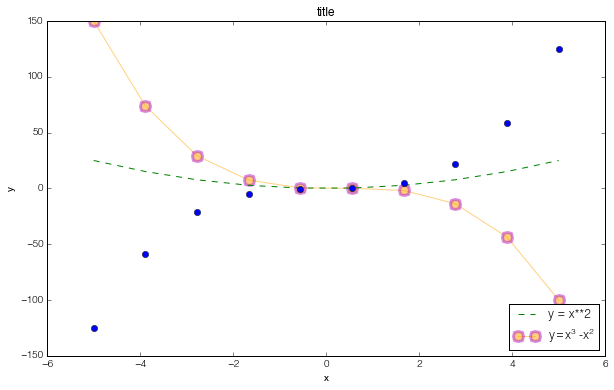

In [4]:


fig = plt.figure(figsize=[10,6])
ax = fig.add_subplot(111)

ax.plot(x, x**2, 'g--', label="y = x**2")  # plotting is very similar to matlab - plot(x, y, 'linespec', args='something else')
ax.plot(x, x**3, 'bo', )  # You can use LaTex math font!
ax.plot(x, x**2 - x**3, 
        color='orange',         # can also abbrev to c='g'
        linestyle='-',  # also ls=
        marker='o',        # can also be specified in the linespec
        markersize=10,     # note this is different from the scatter sizes
        markeredgecolor='#B31BC4',  # mec=
        markeredgewidth=3,
        alpha=0.5,   # sets the transparency
        zorder=-1,   # sets its position obove or below other items layering
        label="$y = x^3 - x^2$") # gives the legend name. When using legend() you don't have to give names

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('title')
ax.legend(loc=0); # upper left corner

# images do not show unless the show() command is used
show()  # this is the equivalent to print, in notebook, if inline plotting is enabled, this does not have to be passed. 


#### Multiplots are so much better!

Using matplotlib, we can also create multiplots. These 

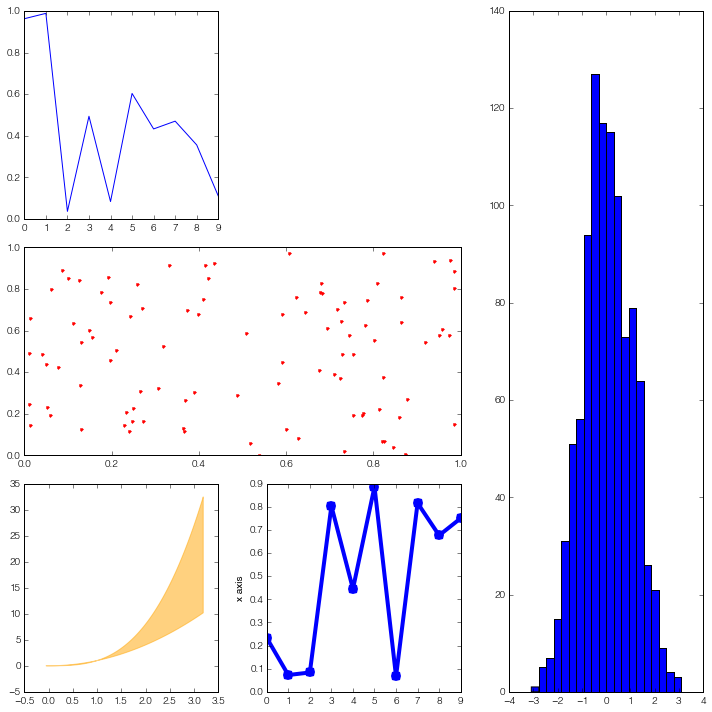

In [8]:
fig = plt.figure(figsize=[10,10])
ax1 = plt.subplot2grid((3,3), (0,0), colspan=1)
ax2 = plt.subplot2grid((3,3), (1,0), colspan=2)
ax3 = plt.subplot2grid((3,3), (0,2), rowspan=3)
ax4 = plt.subplot2grid((3,3), (2,0))
ax5 = plt.subplot2grid((3,3), (2,1))
#fig.subplots_adjust(wspace=0.8)
fig.tight_layout() # some nice spacing!

# adding data to each plot
ax1.plot(rand(10))
ax2.plot(rand(100), rand(100), '.r')
ax3.hist(np.random.normal(size=1000), bins=20)
ax4.fill_between(x, x**2, x**3, color="orange", alpha=0.5)
ax5.plot(rand(10), c='g', lw=4, marker='o', ms=10, mec='none')
ax5.set_ylabel('x axis')

fig.tight_layout()
fig.savefig('multiplot.pdf', transparent=True)
show()

### pColor and Contour plots

Pcolor and contour plots are almost exacly the same in python as in MATLAB. There are subtle differences in the way that you set the labels for the contours, but label placement is a little better. 

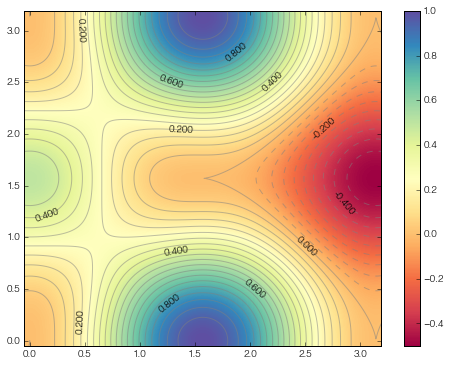

In [9]:
x = arange(-.05, pi+0.05, 0.005)
y = x.copy()

xx, yy = meshgrid(x, y)
zz = sin(xx) * cos(yy)
zz = zz**2 + 0.5*zz.T**3

fig = figure(figsize=[8,6])
ax = fig.add_subplot()
pcolormesh(x, y, zz, 
           cmap=cm.Spectral, rasterized=True) # cmap difnes the colour map. These can be fount in plt.cm.***

colorbar()
C1 = contour(x, y, zz, levels=arange(-1,1,0.05), colors='grey', alpha=0.5)
C2 = contour(x, y, zz, colors='k', alpha=1, linewidths=0)
clabel(C2, color='k')
show()

### 3D plots

It's also possible to make 3D plots using Matplotlib, though here MATLAB may have the upper hand as some features are missing. If you're really interested in this look into the Mayavi2 package a little more. It's a 3D plotting GUI. 

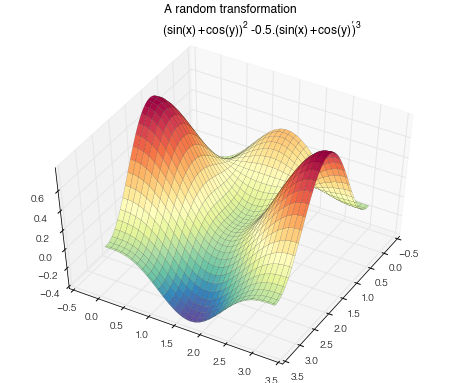

In [10]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

fig = figure(figsize=[8,6])

ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.title.set_text("A random transformation\n\
                   $(sin(x)+cos(y))^2 - 0.5.(sin(x)+cos(y)')^3$")

ax.plot_surface(xx, yy, zz, 
                cmap=cm.Spectral_r, 
                linewidth=.1,
                alpha=1,
                rstride=20,
                cstride=20)

ax.set_zlim(-0.4, .8)
ax.view_init(50,30)
show()